# 数据集模块

## 1. 加载数据集 (load.iris.py)
### 功能
- 加载并返回鸢尾花数据集（与 sklearn 一致的结构），数据从 `datasets/data/` 路径中的多个文件中读取。
### 使用示例

In [35]:
from magilearn.datasets.load_iris import load_iris

# 加载数据集
iris = load_iris()

# 查看数据集信息
print("特征名称:", iris['feature_names'])
print("数据形状:", iris['data'].shape)
print("目标名称:", iris['target_names'])
print("描述信息:", iris['DESCR'])
print("数据示例:")
print(iris['data'][:5])  # 打印前5个样本
print("目标示例:")
print(iris['target'][:5])  # 打印前5个标签

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
数据形状: (450, 4)
目标名称: ['setosa' 'versicolor' 'virginica']
描述信息: Iris dataset: A classic dataset used for classification problems.
数据示例:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
目标示例:
[0 0 0 0 0]


## 2. 数据集划分 (train_test_split.py)
### 功能
- train_test_split 函数将数据集划分为训练集和测试集，用于模型的训练和评估。
### 使用示例

In [14]:
from magilearn.datasets import train_test_split
import numpy as np

# 生成示例数据
X = np.arange(10).reshape((5, 2))
y = np.array([0, 1, 0, 1, 0])

# 分割数据集 (80% 训练集, 20% 测试集)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[2 3]
 [8 9]
 [4 5]
 [0 1]]
X_test: [[6 7]]
y_train: [1 0 0 0]
y_test: [1]


## 3. 数据集生成 (make_classification)
### 功能
- make_classification 函数用于生成一个用于分类任务的随机数据集。用户可以自定义特征数、类别数、信息性特征数、冗余特征数等，此外，还可以通过控制类别间隔来增强类别之间的分离性。

### 使用示例

In [15]:
from magilearn.datasets import make_classification
import numpy as np

# 生成示例数据
X, y = make_classification(n_samples=200, n_features=10, n_informative=3, n_redundant=2, n_classes=3, class_sep=2.0, random_state=42)

print("特征矩阵 X:\n", X[:5])  # 打印前五行特征
print("标签数组 y:\n", y[:5])  # 打印前五个标签

特征矩阵 X:
 [[ 2.12922118  2.10939479  2.72576662  3.73803326  0.05030388 -0.73093004
  -0.03312697  1.79455786 -0.5176113   0.22378795]
 [ 1.52302986 -0.23415337 -0.23413696 -0.24870582 -2.11882148  3.85273149
   0.57089051  1.13556564  0.95400176  0.65139125]
 [-0.99053633 -0.56629773  0.09965137 -0.15234449  0.91959541  0.33231401
  -0.74848654  1.55115198  0.11567463  1.17929718]
 [ 4.47704083  4.07682189  2.71700778  6.35689081  0.2298287   0.95670232
  -0.78598946 -1.33123295 -1.83620537  0.50799133]
 [ 0.24196227 -1.91328024 -1.72491783 -2.53863758 -3.1672156  -0.47193187
   1.0889506   0.06428002 -1.07774478 -0.71530371]]
标签数组 y:
 [1 0 0 2 0]


## 4. 调整类别之间的分离性
### 功能
- class_sep 参数能够控制不同类别之间的分离度。默认情况下，类别之间的间隔为 1.0。增大 class_sep 的值会增加类别之间的分离度，生成的样本之间的区分更加明显。
### 影响
- 增加 class_sep 值：会使类别之间的分布更加分开，可能更容易实现准确的分类。 
- 减小 class_sep 值：类别之间的重叠增加，生成的分类问题变得更加困难。
### 使用示例

In [18]:
from magilearn.datasets.make_classification import make_classification

X, y = make_classification(
    n_samples=1000,         # 样本数
    n_features=20,          # 特征数
    n_classes=2,            # 类别数
    random_state=42         # 随机种子
)

# 打印特征和标签的形状
print("特征矩阵形状:", X.shape)
print("标签数组形状:", y.shape)

# 查看前5个样本
print("特征矩阵（前5行）:\n", X[:5])
print("标签（前5个）:", y[:5])

特征矩阵形状: (1000, 20)
标签数组形状: (1000,)
特征矩阵（前5行）:
 [[ 6.80092722e-01  2.39083355e+00  3.20698763e+00 -2.39322797e+00
  -8.81548689e-02  1.77764482e+00  8.76205992e-01  5.74081282e-01
   1.95813162e+00  4.89811255e-01 -1.98652714e+00  8.32665758e-01
  -1.59200846e+00  4.52005369e-01 -1.71374357e+00 -4.66855410e-01
  -3.63784530e-01 -7.70119107e-01 -3.48851997e-01  1.03256172e+00]
 [ 4.36790266e-01  2.98042702e-01  8.21203174e-01 -5.69755365e-01
   1.01585652e+00 -1.46703395e+00  8.53761518e-03  1.60954166e+00
  -2.40208871e-01  9.31011855e-01  4.93117527e-01  9.55860607e-01
  -8.09760542e-01 -8.05401670e-01  2.02718921e-02 -1.53222179e+00
  -2.69740607e-01  2.52876658e-01  1.78463561e+00  4.02718189e-01]
 [ 6.14166700e-01  7.57507710e-01  9.04607976e-01  7.78196208e-02
  -1.04612109e+00  4.73407416e-01  2.90947364e-01  9.57839631e-01
  -7.90881792e-01  3.40080962e-02 -1.36502180e+00  7.01494782e-01
   5.18871180e-01  4.95805021e-01  1.61903136e-03  4.14772891e-01
   1.60433911e+00 -2.850942

# 特征选择模块 (feature_selection)
- feature_selection 模块提供了多种特征选择的方法，用于选择对模型效果最重要的特征。该模块包括降维、递归特征消除、基于模型的特征选择以及选择最优的 K 个特征等多种方法，功能与 sklearn.feature_selection 模块相似。


## 1. 主成分分析 (PCA)
### 功能
- PCA 类实现了主成分分析，用于降维处理，将高维特征映射到低维空间，同时保留数据的最大方差。它通过构造特征的线性组合来减少冗余信息，适合于数据降维和噪声过滤。
### 使用示例

In [20]:
from magilearn.feature_selection import PCA
import numpy as np

# 生成示例数据
X = np.array([[2.5, 2.4, 1.2], [0.5, 0.7, 1.1], [2.2, 2.9, 0.9], [1.9, 2.2, 1.3], [3.1, 3.0, 1.0]])

# 保留2个主成分
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("降维后的数据:\n", X_pca)

降维后的数据:
 [[-0.44004812 -0.22970588]
 [ 2.17604115 -0.02266559]
 [-0.57707158  0.40931713]
 [ 0.13548924 -0.01308289]
 [-1.29441069 -0.14386276]]


## 2. 递归特征消除 (RFE)
### 功能
- RFE 类实现了递归特征消除算法，通过递归训练模型、评估特征重要性，逐步移除不重要的特征，直到达到预期的特征数量。
### 使用示例

In [45]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# 实现RFE后更改下面一行
# from sklearn.feature_selection import RFE
from magilearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化逻辑回归模型
model = LogisticRegression(max_iter=200)

# 使用RFE进行特征选择，这里我们选择最重要的2个特征
selector = RFE(estimator=model, n_features_to_select=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 打印被选择的特征索引
print("Selected features:", selector.get_support(indices=True))

# 使用逻辑回归进行训练
model.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_selected)

# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on selected features: {accuracy:.4f}")


TypeError: 'module' object is not callable

## 3. 基于模型的特征选择 (SelectFromModel)
### 功能
- SelectFromModel 类利用带有特征权重的模型（如线性回归、决策树）进行特征选择，选择权重值高于指定阈值的特征。
### 使用示例

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from magilearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化决策树分类器
model = DecisionTreeClassifier(random_state=42)

# 使用决策树进行训练
model.fit(X_train, y_train)

# 使用SelectFromModel来选择重要特征
selector = SelectFromModel(model, threshold="mean")  # 选择重要性大于平均值的特征
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 打印被选择的特征索引
print("Selected features:", selector.get_support(indices=True))

# 使用原始特征进行预测
y_pred = model.predict(X_test)
# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on original features: {accuracy:.4f}")

# 使用选择的特征重新训练模型
model_selected = DecisionTreeClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)

# 使用训练好的模型进行预测
y_pred = model_selected.predict(X_test_selected)

# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on selected features: {accuracy:.4f}")

Selected features: [2]
Accuracy on original features: 1.0000
Accuracy on selected features: 0.9556


## 4. 选择 k 个最佳特征 (SelectKBest)
### 功能
- SelectKBest 函数用于选择最优的 K 个特征，通常根据单变量统计指标（如卡方、F 值）进行选择。
### 使用示例

In [53]:
import numpy as np
from magilearn.datasets import load_iris
from magilearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# 加载 Iris 数据集
iris = load_iris()
X = iris['data']
y = iris['target']
# 选择 K 个最佳特征
selector = SelectKBest(score_func=f_classif, k=2)
# 拟合并转换数据
X_new = selector.fit_transform(X, y)
# 输出选择的特征
print("Original feature shape:", X.shape)
print("Reduced feature shape:", X_new.shape)
print("Selected features (indices):", selector.get_support(indices=True))


Original feature shape: (450, 4)
Reduced feature shape: (450, 2)
Selected features (indices): [3 2]


# 模型评估模块（metrics）
- **分类评估指标**：准确率、混淆矩阵、精确率、召回率和 ROC AUC。

## 1.准确率 (Accuracy Score)

- 准确率是正确预测样本的比例，用于衡量分类模型的整体表现。

### 使用示例

In [54]:
from magilearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0]  # 真实标签
y_pred = [1, 0, 1, 0, 0]  # 预测标签

accuracy = accuracy_score(y_true, y_pred)
print("准确率:", accuracy)

准确率: 0.8


## 2.混淆矩阵 (Confusion Matrix)

- 混淆矩阵用于展示分类模型的分类效果，矩阵的每一行表示实际类，列表示预测类。适用于多分类问题。

### 使用示例

In [55]:
from magilearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 0]

matrix = confusion_matrix(y_true, y_pred)
print("混淆矩阵:\n", matrix)

混淆矩阵:
 [[2 0]
 [1 2]]


## 3.精确率和召回率 (Precision & Recall)

- 精确率：正确预测的正类样本占所有预测为正的样本的比例。
- 召回率：正确预测的正类样本占实际正类样本的比例。

### 使用示例

In [56]:
from magilearn.metrics import precision_score, recall_score

y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 0]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print("精确率:", precision)
print("召回率:", recall)

精确率: 1.0
召回率: 0.6666666666666666


## 4.ROC AUC (Receiver Operating Characteristic - Area Under Curve)

- ROC AUC 用于评估分类模型的判别能力，值越接近 1 表明模型的分类效果越好。

### 使用示例

In [57]:
from magilearn.metrics import roc_auc_score

y_true = [1, 0, 1, 1, 0]
y_scores = [0.8, 0.4, 0.9, 0.6, 0.3]  # 预测分数或概率

auc = roc_auc_score(y_true, y_scores)
print("ROC AUC:", auc)

ROC AUC: 1.0


## 5.metrics使用示例

In [60]:
from magilearn.datasets import make_classification
from magilearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from magilearn.models import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
from magilearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
# from magilearn.feature_selection import RFE
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from magilearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np


# 1. 生成模拟数据集
X, y = make_classification(
    n_samples=1000,         # 样本数
    n_features=20,          # 特征数
    n_informative=10,       # 有信息的特征数
    n_redundant=5,          # 冗余特征数
    random_state=42         # 随机种子
)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 数据预处理 - 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 特征选择 - 使用递归特征消除 (RFE)
model = RandomForestClassifier(random_state=42)
selector = RFE(model, n_features_to_select=10)  # 选择10个最重要的特征
selector.fit(X_train_scaled, y_train)

# 获取选择的特征
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# 5. 模型训练与评估
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)


# 6. 获取预测分数（概率）用于 ROC AUC 计算
y_train_scores = model.predict_proba(X_train_selected)[:, 1]  # 获取正类概率
y_test_scores = model.predict_proba(X_test_selected)[:, 1]    # 获取正类概率

# 7. 评估模型性能
print("测试集准确率:", accuracy_score(y_test, y_pred))
print("测试集精确率:", precision_score(y_test, y_pred))
print("测试集召回率:", recall_score(y_test, y_pred))
print("\n混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("\n分类报告:\n", classification_report(y_test, y_pred))

# 计算并输出 ROC AUC 分数
train_auc = roc_auc_score(y_train, y_train_scores)
test_auc = roc_auc_score(y_test, y_test_scores)

print("\n训练集 ROC AUC:", train_auc)
print("测试集 ROC AUC:", test_auc)


# 8. 特征重要性
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\n特征重要性:")
for f in range(X_train_selected.shape[1]):
    print(f"特征 {indices[f]}: {importances[indices[f]]:.4f}")

测试集准确率: 0.9666666666666667
测试集精确率: 0.9794520547945206
测试集召回率: 0.9533333333333334

混淆矩阵:
 [[147   3]
 [  7 143]]

分类报告:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       150
           1       0.98      0.95      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


训练集 ROC AUC: 0.9996081632653061
测试集 ROC AUC: 0.9897555555555555

特征重要性:
特征 7: 0.2877
特征 5: 0.0989
特征 3: 0.0952
特征 4: 0.0946
特征 0: 0.0851
特征 6: 0.0805
特征 8: 0.0753
特征 2: 0.0642
特征 9: 0.0600
特征 1: 0.0585


# 模型选择与评估模块 (model_selection)
- model_selection 模块提供了一组工具用于分割数据集、评估模型性能以及选择最佳模型参数。该模块包括以下工具：


## 1. 网格搜索 (grid_search.py)
### 功能
- GridSearchCV 类用于在给定的参数网格中搜索最佳模型参数。

### 使用示例

## 2. 交叉验证 (cross_val_score.py)
### 功能
- cross_val_score 函数执行 K 折交叉验证并返回每一折的得分。常用于评估模型的稳定性和泛化能力。
### 使用示例

In [64]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# from magilearn.model_selection import cross_val_score

# 生成一个随机的二分类数据集
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# 创建一个逻辑回归模型
model = LogisticRegression()

# 使用 cross_val_score 进行交叉验证
scores = cross_val_score(estimator=model, X=X, y=y, cv=5)

# 输出交叉验证的得分
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))

Cross-validation scores: [0.9  1.   0.85 0.95 0.95]
Mean score: 0.93


## 3. 模型保存与载入模块 (save_model.py & load_model.py)

# 分类与回归模型模块 (models)
- models模块实现了多种机器学习模型，涵盖分类、回归和聚类任务。该模块中的模型设计类似于 scikit-learn 的风格，支持常用的训练、预测和评估方法，方便用户直接调用。


## 1. 逻辑回归 (logistic_regression.py)
### 功能
- LogisticRegression 类实现了逻辑回归模型，适用于二分类任务。
  
### 使用示例

Magilearn Logistic Regression Accuracy: 0.9888888888888889
Sklearn Logistic Regression Accuracy: 1.0


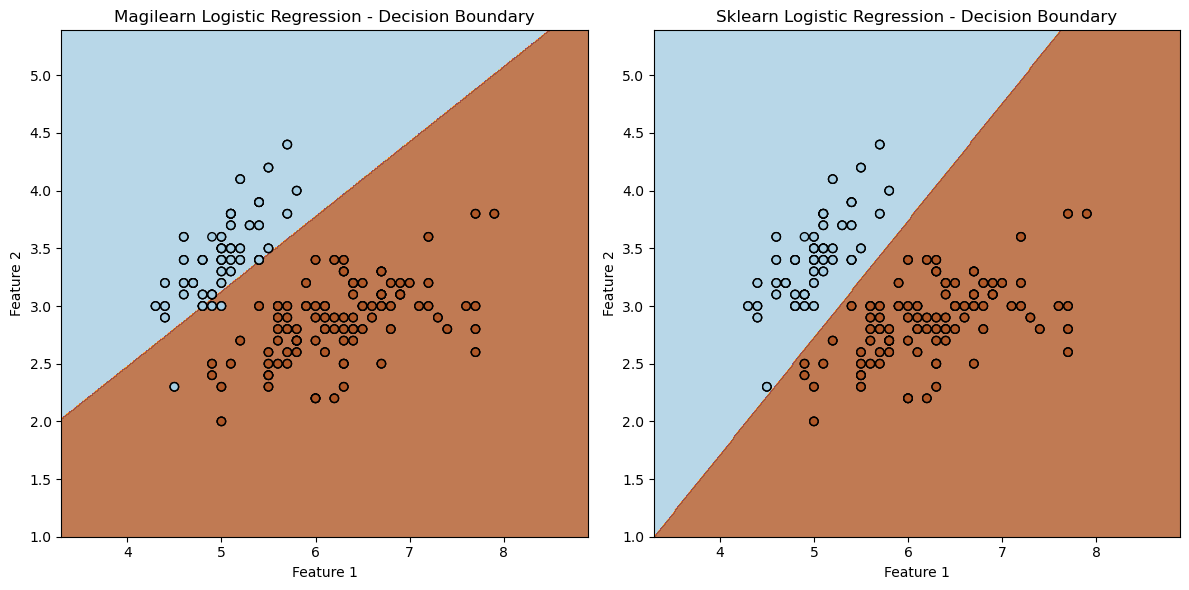

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from magilearn.datasets import load_iris, train_test_split
from magilearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from magilearn.models import LogisticRegression

# 加载鸢尾花数据集
iris = load_iris()
X = iris['data'][:, :2]  # 选择前两个特征进行可视化
y = (iris['target'] != 0).astype(int)  # 将多分类问题转化为二分类问题（非类别 0 为正类）

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# 使用自定义的逻辑回归模型
custom_model = LogisticRegression(learning_rate=0.001, num_iterations=10000, tol=1e-6)
custom_model.fit(X_train, y_train)

# 使用 sklearn 的逻辑回归模型
sklearn_model = SklearnLogisticRegression(solver='lbfgs', max_iter=10000, tol=1e-6)
sklearn_model.fit(X_train, y_train)

# 预测并评估模型
y_pred_custom = custom_model.predict(X_test)
y_pred_sklearn = sklearn_model.predict(X_test)

# 输出准确率
print("Magilearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))

# 可视化决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 预测决策边界
Z_custom = custom_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = Z_custom.reshape(xx.shape)

Z_sklearn = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

# 绘制决策边界
plt.figure(figsize=(12, 6))

# 自定义模型的决策边界
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_custom, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Magilearn Logistic Regression - Decision Boundary")

# Sklearn模型的决策边界
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Sklearn Logistic Regression - Decision Boundary")

plt.tight_layout()
plt.show()


## 2. 线性回归 (linear_regression.py)
### 功能
- LinearRegression 类实现了线性回归模型，用于回归任务，拟合输入特征与连续标签之间的线性关系。
### 使用示例

Magilearn Linear Regression - Mean Squared Error: 414.1009
Magilearn Linear Regression - R² Score: 0.8093
Sklearn Linear Regression - Mean Squared Error: 413.8921
Sklearn Linear Regression - R² Score: 0.8094


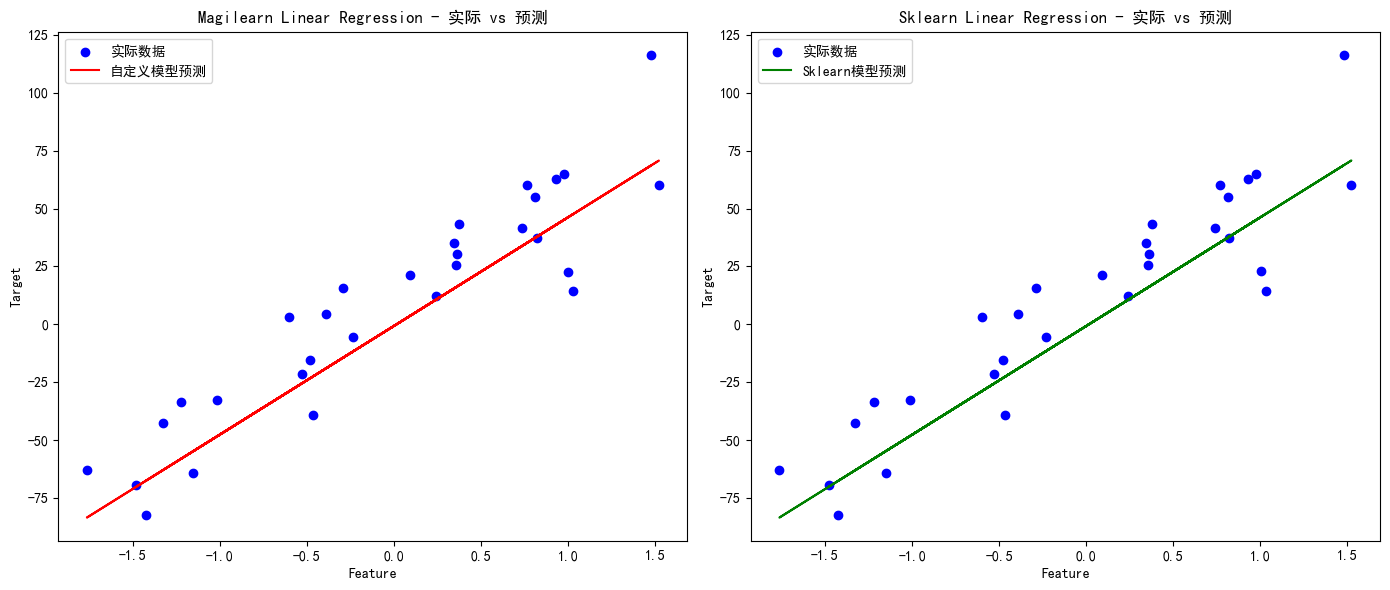

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from magilearn.models import LinearRegression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# 生成回归数据集
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化自定义的线性回归模型
custom_model = LinearRegression()

# 使用训练集进行自定义模型训练
custom_model.fit(X_train, y_train)

# 使用自定义模型对测试集进行预测
y_pred_custom = custom_model.predict(X_test)

# 计算自定义模型的均方误差和R²分数
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

# 初始化sklearn的线性回归模型
sklearn_model = SklearnLinearRegression()

# 使用训练集进行sklearn模型训练
sklearn_model.fit(X_train, y_train)

# 使用sklearn模型对测试集进行预测
y_pred_sklearn = sklearn_model.predict(X_test)

# 计算sklearn模型的均方误差和R²分数
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

# 输出模型评估指标
print(f"Magilearn Linear Regression - Mean Squared Error: {mse_custom:.4f}")
print(f"Magilearn Linear Regression - R² Score: {r2_custom:.4f}")
print(f"Sklearn Linear Regression - Mean Squared Error: {mse_sklearn:.4f}")
print(f"Sklearn Linear Regression - R² Score: {r2_sklearn:.4f}")

# 可视化对比图
plt.figure(figsize=(14, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制实际数据点与自定义模型的回归线
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_custom, color='red', label='自定义模型预测')
plt.title('Magilearn Linear Regression - 实际 vs 预测')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# 绘制实际数据点与sklearn模型的回归线
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_sklearn, color='green', label='Sklearn模型预测')
plt.title('Sklearn Linear Regression - 实际 vs 预测')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

## 3. 决策树分类 (decision_tree.py)
### 功能
- DecisionTreeClassifier 实现了决策树分类器，适用于分类任务，能够处理连续和离散数据。
### 使用示例

Magilearn决策树准确率: 1.00
Sklearn决策树准确率: 1.00


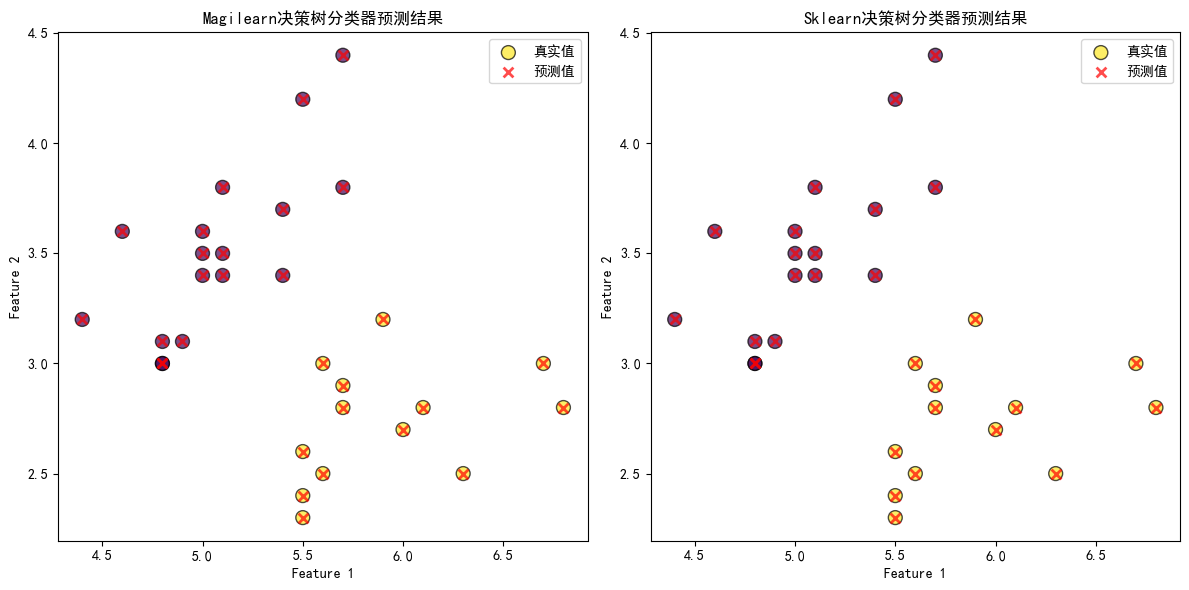

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTree
from magilearn.models.decision_tree_classifier import DecisionTreeClassifier

# 1. 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 只保留两类数据 (Setosa 和 Versicolor)，将其简化为二分类
binary_mask = (y == 0) | (y == 1)
X, y = X[binary_mask], y[binary_mask]

# 只取前两个特征方便可视化
X = X[:, :2]

# 2. 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 使用自定义的决策树分类器训练并预测
custom_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
custom_clf.fit(X_train, y_train)
y_pred_custom = custom_clf.predict(X_test)

# 4. 使用 sklearn 的决策树分类器训练并预测
sklearn_clf = SklearnDecisionTree(max_depth=3, min_samples_split=4)
sklearn_clf.fit(X_train, y_train)
y_pred_sklearn = sklearn_clf.predict(X_test)

# 5. 输出准确率
print(f"Magilearn决策树准确率: {accuracy_score(y_test, y_pred_custom):.2f}")
print(f"Sklearn决策树准确率: {accuracy_score(y_test, y_pred_sklearn):.2f}")

# 6. 可视化预测结果
plt.figure(figsize=(12, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制自定义决策树的预测结果
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='black',
            s=100, label='真实值', alpha=0.7, facecolors='none')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', s=50,
            label='预测值', linewidths=2, alpha=0.7, color='red')
plt.title('Magilearn决策树分类器预测结果')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')

# 绘制sklearn决策树的预测结果
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='black',
            s=100, label='真实值', alpha=0.7, facecolors='none')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', s=50,
            label='预测值', linewidths=2, alpha=0.7, color='red')
plt.title('Sklearn决策树分类器预测结果')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## 4. 随机森林分类器 (random_forest.py)
### 功能
- RandomForestClassifier 实现了随机森林分类器，通过集成多个决策树提高模型的准确性和泛化能力。
### 使用示例

Custom RandomForest Accuracy: 96.67%
Sklearn RandomForest Accuracy: 100.00%


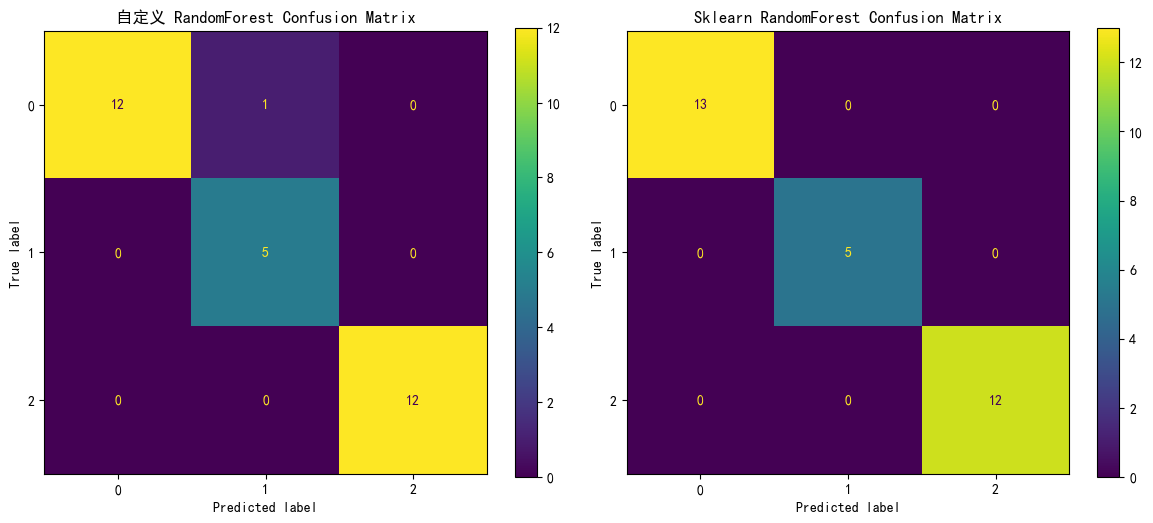

IndexError: index 2 is out of bounds for axis 0 with size 2

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from magilearn.datasets import make_classification, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForest
from magilearn.models import RandomForestClassifier

# 创建一个简单的分类数据集:100 个样本、5 个特征的分类数据集，分为 3 个类别
X, y = make_classification(n_samples=100, n_features=5, n_classes=3, n_clusters_per_class=1, n_informative=3, random_state=42)

# 切分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用 PCA 将数据降至二维
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# 实例化并训练 RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, max_features=3)
rf_clf.fit(X_train, y_train)

# 对测试集进行预测
y_pred_custom = rf_clf.predict(X_test)

# 计算自定义模型的准确率
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom RandomForest Accuracy: {accuracy_custom * 100:.2f}%")

# 实例化并训练 sklearn 中的 RandomForestClassifier
sklearn_rf_clf = SklearnRandomForest(n_estimators=10, max_features=3)
sklearn_rf_clf.fit(X_train, y_train)

# 对测试集进行预测
y_pred_sklearn = sklearn_rf_clf.predict(X_test)

# 计算 sklearn 模型的准确率
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn RandomForest Accuracy: {accuracy_sklearn * 100:.2f}%")

# 混淆矩阵的可视化
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 自定义模型的混淆矩阵
cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom)
disp_custom.plot(ax=ax[0])
ax[0].set_title("自定义 RandomForest Confusion Matrix")

# Sklearn 模型的混淆矩阵
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn)
disp_sklearn.plot(ax=ax[1])
ax[1].set_title("Sklearn RandomForest Confusion Matrix")

plt.tight_layout()
plt.show()

# 决策边界图（PCA降至二维时）
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# 使用自定义模型进行预测
Z_custom = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = Z_custom.reshape(xx.shape)

# 使用sklearn模型进行预测
Z_sklearn = sklearn_rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

plt.figure(figsize=(12, 6))

# 自定义模型的决策边界
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_custom, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("自定义 RandomForest - Decision Boundary")

# Sklearn模型的决策边界
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Sklearn RandomForest - Decision Boundary")

plt.tight_layout()
plt.show()

## 5. 梯度提升分类器 (gradient_boosting.py)
### 功能
- GradientBoostingClassifier 实现了梯度提升分类器，使用提升方法通过逐步构建多个弱分类器来提高预测精度。
### 使用示例

## 6. K均值聚类 (k_means.py)
### 功能
- KMeans 实现了 K 均值聚类算法，用于无监督聚类，将样本分配到 k 个簇中。
### 使用示例

Magilearn KMeans Silhouette Score: 0.8715
Magilearn KMeans Cluster Centers:
 [[ 4.50235462  2.13138331]
 [-6.87333201 -6.56769057]
 [-2.65139471  8.98989139]]
Sklearn KMeans Silhouette Score: 0.8715
Sklearn KMeans Cluster Centers:
 [[-2.65139471  8.98989139]
 [-6.87333201 -6.56769057]
 [ 4.50235462  2.13138331]]


D:\anaconda3\envs\ShiXun\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


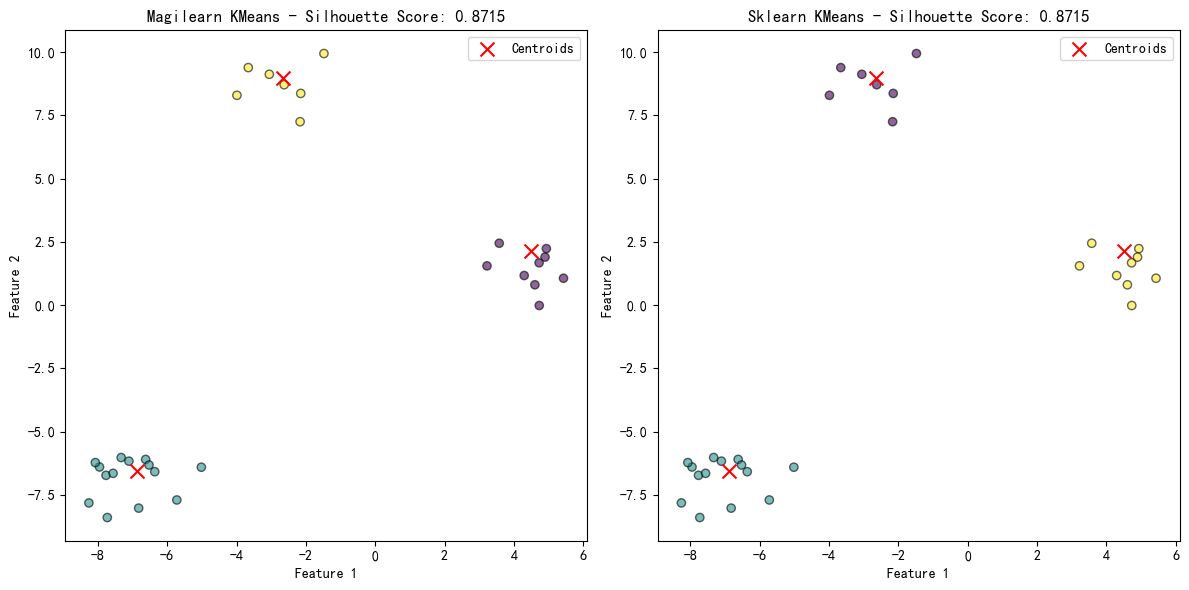

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SklearnKMeans
from magilearn.models import KMeans
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # 指定使用 4 个核心

# 生成聚类数据集
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# 划分训练集和测试集
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# 实例化并训练自定义 KMeans 模型
model_custom = KMeans(n_clusters=3, random_state=42)
model_custom.fit(X_train)

# 对测试集进行预测
y_pred_custom = model_custom.predict(X_test)

# 计算自定义模型的轮廓系数
silhouette_custom = silhouette_score(X_test, y_pred_custom)

# 输出自定义 KMeans 的轮廓系数和聚类中心
print(f"Magilearn KMeans Silhouette Score: {silhouette_custom:.4f}")
print("Magilearn KMeans Cluster Centers:\n", model_custom.cluster_centers_)

# 实例化并训练 sklearn 的 KMeans 模型
model_sklearn = SklearnKMeans(n_clusters=3, random_state=42)
model_sklearn.fit(X_train)

# 对测试集进行预测
y_pred_sklearn = model_sklearn.predict(X_test)

# 计算 sklearn 模型的轮廓系数
silhouette_sklearn = silhouette_score(X_test, y_pred_sklearn)

# 输出 sklearn KMeans 的轮廓系数和聚类中心
print(f"Sklearn KMeans Silhouette Score: {silhouette_sklearn:.4f}")
print("Sklearn KMeans Cluster Centers:\n", model_sklearn.cluster_centers_)

# 可视化对比
plt.figure(figsize=(12, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 自定义 KMeans 聚类结果
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
plt.scatter(model_custom.cluster_centers_[:, 0], model_custom.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title(f"Magilearn KMeans - Silhouette Score: {silhouette_custom:.4f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Sklearn KMeans 聚类结果
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
plt.scatter(model_sklearn.cluster_centers_[:, 0], model_sklearn.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title(f"Sklearn KMeans - Silhouette Score: {silhouette_sklearn:.4f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

# 管道模块（pipline）
- pipeline 模块提供了一组工具，用于构建和管理机器学习模型的流水线（Pipeline），通过自动化整个训练、预测和评估过程，帮助简化和组织机器学习工作流。该模块包括以下工具，功能与 sklearn.pipeline 模块保持一致：


## 1. 自定义管道 (pipeline.py)

### 功能
- Pipeline 类允许将多个处理步骤（如数据预处理、模型训练等）组合成一个流水线，简化整个工作流程，并在一个对象中封装所有步骤。
### 使用示例

In [72]:
from magilearn.datasets import make_classification
from magilearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from magilearn.models.logistic_regression import LogisticRegression
from magilearn.pipeline import Pipeline

# 生成数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 创建管道
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# 拟合模型
pipeline.fit(X, y)

# 预测
y_pred = pipeline.predict(X)

# 计算准确率
accuracy = pipeline.score(X, y)
print(f"模型准确率: {accuracy:.2f}")

模型准确率: 0.85


# 数据预处理（preprocessing）
- 数据预处理工具：标准化、归一化、One-Hot 编码和标签编码。

## 1.标准化 (Standardization)

### 功能 
- 将数据标准化，使每个特征的均值为 0，方差为 1，适用于需要标准正态分布的数据。
### 使用示例

In [73]:
from magilearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[1, 2], [2, 3], [3, 4]])  # 示例数据

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("标准化数据:\n", X_scaled)

标准化数据:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


## 2.归一化 (Normalization)

### 功能 
- 将数据缩放到指定范围（默认 [0, 1]），适用于需要特定范围的数据。
### 使用示例

In [74]:
from magilearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array([[1, 2], [2, 3], [3, 4]])  # 示例数据

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print("归一化数据:\n", X_normalized)

归一化数据:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


## 3.One-Hot 编码 (One-Hot Encoding)

### 功能 
- 将分类特征转换为独热编码矩阵，每个类别用唯一的二进制向量表示。
### 使用示例

In [75]:
from magilearn.preprocessing import OneHotEncoder
import numpy as np

X = np.array([["apple"], ["banana"], ["apple"], ["orange"]])  # 示例数据

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
print("One-Hot 编码:\n", X_encoded)

One-Hot 编码:
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## 4.标签编码 (Label Encoding)

### 功能 
- 将分类标签转换为整数编码，用于将类别标签映射到整数值。
### 使用示例

In [76]:
from magilearn.preprocessing import LabelEncoder
import numpy as np

y = np.array(["cat", "dog", "fish", "monkey", "tiger"])  # 示例标签

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("标签编码:", y_encoded)

标签编码: [0 1 2 3 4]


## 5.标准化（StandardScaler）与归一化（MinMaxScaler）用例

### 功能 
- StandardScaler 通过去除均值并缩放到单位方差来标准化特征。MinMaxScaler 将特征缩放到指定的范围，通常是 [0, 1]。这些缩放器在机器学习中常用于归一化数据，以提升模型性能和训练稳定性。
### 使用示例

In [77]:
from sklearn.datasets import make_classification
from magilearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
from magilearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from magilearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import numpy as np
from magilearn.metrics import roc_auc_score

# 1. 生成模拟数据集
X, y = make_classification(
    n_samples=1000,         # 样本数
    n_features=20,          # 特征数
    n_classes=2,            # 类别数
    random_state=42         # 随机种子
)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 数据预处理 + 模型构建使用Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),              # 数据标准化
    ('classifier', LogisticRegression())       # 逻辑回归模型
])

# 4. 参数网格搜索 (GridSearchCV) 设置超参数组合
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],      # 正则化强度
    'classifier__solver': ['liblinear', 'lbfgs']  # 求解器选择
}

# 5. 交叉验证 (5折) + 网格搜索寻找最佳参数组合
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 6. 使用最优参数训练模型
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 7.获取训练集和测试集的预测分数（概率）用于计算 ROC AUC
y_train_scores = best_model.predict_proba(X_train)[:, 1]  # 获取正类概率
y_test_scores = best_model.predict_proba(X_test)[:, 1]    # 获取正类概率
# 计算并输出 ROC AUC 分数
train_auc = roc_auc_score(y_train, y_train_scores)
test_auc = roc_auc_score(y_test, y_test_scores)

# 8. 评估模型性能
print("\n训练集准确率:", accuracy_score(y_train, y_pred_train))
print("测试集准确率:", accuracy_score(y_test, y_pred_test))
print("\n训练集精确确率:", precision_score(y_train, y_pred_train))
print("测试集精确率:", precision_score(y_test, y_pred_test))
print("\n训练集召回率:", recall_score(y_train, y_pred_train))
print("测试集召回率:", recall_score(y_test, y_pred_test))
print("\n训练集 ROC AUC:", train_auc)
print("测试集 ROC AUC:", test_auc)
print("\n混淆矩阵 (测试集):\n", confusion_matrix(y_test, y_pred_test))
print("\n分类报告 (测试集):\n", classification_report(y_test, y_pred_test))

# 9. 使用交叉验证进一步验证模型稳定性
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("\n交叉验证准确率均值:", np.mean(cv_scores))
print("交叉验证准确率标准差:", np.std(cv_scores))

TypeError: 'str' object is not callable

## 6.标签编码（LabelEncoder）与独热编码（OneHotEncoder）用例

### 功能 
- OneHotEncoder 将类别特征转换为二进制矩阵，每个类别由一个唯一的二进制向量表示。LabelEncoder 使用 0 到 n_classes-1 的值对标签进行编码，将类别标签转换为整数标签。这些编码器在机器学习中被广泛使用，以便有效处理类别特征。
### 使用示例

In [78]:
import numpy as np
from magilearn.preprocessing import OneHotEncoder, LabelEncoder

# 原始分类数据
X = np.array([['红色'], ['蓝色'], ['绿色'], ['红色']])

# 使用 OneHotEncoder
encoder1 = OneHotEncoder()
X_encoded = encoder1.fit_transform(X)
print("独热编码后的数据:\n", X_encoded)

# 使用 LabelEncoder
encoder2 = LabelEncoder()
y_encoded = encoder2.fit_transform(X)


print("编码后的标签:", y_encoded)

独热编码后的数据:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
编码后的标签: [0 2 1 0]
